In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("(32-data B) 2019_nCoV_data.csv")

In [3]:
death = df[df['Deaths'] > 0].groupby('Province/State')[["Confirmed", "Deaths", "Recovered"]].sum()

In [4]:
death

,Confirmed,Deaths,Recovered
Province/State,,,
Beijing,1356,9,73
Chongqing,1503,8,34
Fujian,18,1,0
Hainan,531,9,15
Hebei,836,13,13
Heilongjiang,788,17,10
Henan,4065,19,88
Hong Kong,18,1,0
Hubei,77732,2546,2075


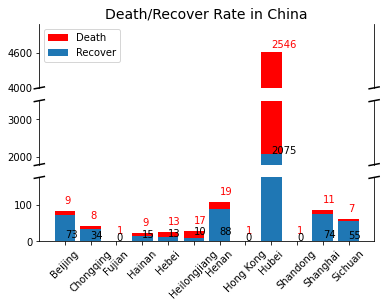

In [126]:
index = death.index
y_death = death["Deaths"].values
y_confirmed = death["Confirmed"].values
y_recover = death["Recovered"].values

# Draw subplots
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
ax1.bar(index, y_death, color="red", bottom = y_recover, label="Death")
ax1.bar(index, y_recover, label="Recover")

ax2.bar(index, y_death, color="red", bottom = y_recover)
ax2.bar(index, y_recover)
ax3.bar(index, y_death, color="red", bottom = y_recover)
ax3.bar(index, y_recover)
plt.xticks(rotation=45)

# Draw broken y-axis graph
ax2.set_xticks([])  
ax1.set_xticks([])  

ax3.set_ylim(0, 175)
ax2.set_ylim(1800, 3500)
ax1.set_ylim(4000, 5100)
ax1.set_yticks(np.arange(4000, 4800, 600))

# hide the spines 
ax3.spines['top'].set_visible(False)
ax3.tick_params(labeltop=False)

ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)
ax2.tick_params(labeltop=False)
ax2.tick_params(labelbottom=False)

ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.tick_params(labeltop='off')
ax1.tick_params(labelbottom='off')


d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d,+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(-d,+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((1-d,1+d), (1-d,1+d), **kwargs)

ax2.plot((-d,+d), (-d,+d), **kwargs)
ax2.plot((1-d,1+d),(-d,+d), **kwargs)

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d,+d), (1-d,1+d), **kwargs)
ax3.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Annotating
for (a,b,c) in zip(index, y_death, y_recover):
    if (b <= 300):
        plt.text(a, b+c+20, str(int(b)), color='red')
    else:
        plt.text(a, 530, str(int(b)), color="red")
    if (c <= 300):
        plt.text(a, b, str(int(c)))
    else:
        plt.text(a, 240, str(int(c)))

# fig.tight_layout()
ax1.legend(loc="upper left")
ax1.set_title("Death/Recover Rate in China", fontsize=14)
plt.show()